# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [26]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import errors

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [3]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
356 µs ± 72.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 113.85 MiB, increment: 0.20 MiB


SIZE:  1000
Timing: 
20 ms ± 1.18 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 122.05 MiB, increment: 8.21 MiB


SIZE:  10000
Timing: 
1.88 s ± 25 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2295.96 MiB, increment: 2183.06 MiB




***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


Ad. 1.
W każdym wypadku powinniśmy otrzymać wynik równy zero. Jednak dla kilku wartości wynik jest jedynie w przybliżeniu równy zeru.

Ad. 2.
Skończoną reprezentację mają liczby, które da się przedstawić za pomocą krotności potęg dwójki. W naszym wypadku są to 
0.125, 0.25, 0.5. 

Ad. 3.
Wynika to z tego, że komputer posiada skończoną liczbę bitów na przechowanie zmiennej.

Ad. 4.
W tym przypadku mamy do czynienia z błędem zaokrągleń.

Ad. 5.
Zastosowanie innej kolejności wykonywania działań pomoże uniknąć błędów zaokrągleń lub poprzez zwiększenie liczby bitów odpowiadających mantysie.

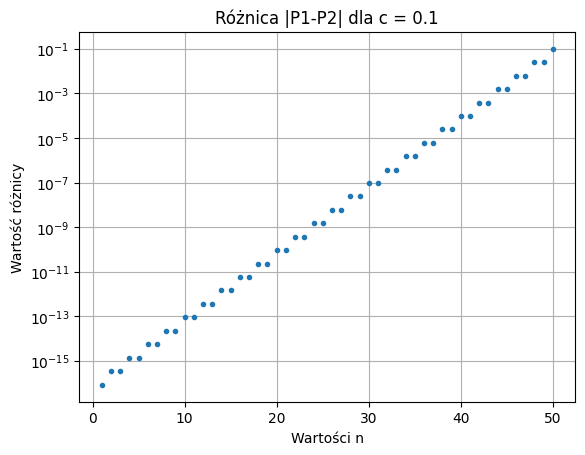

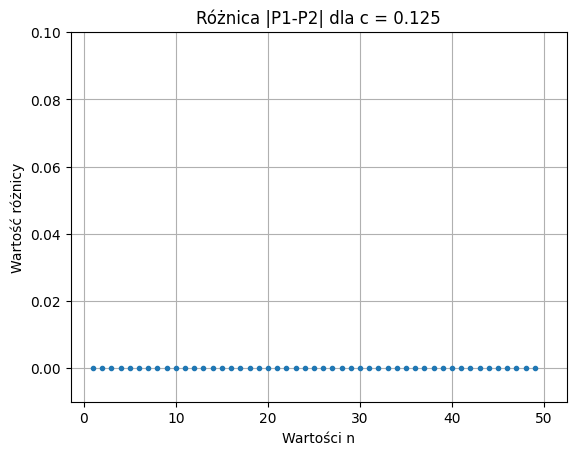

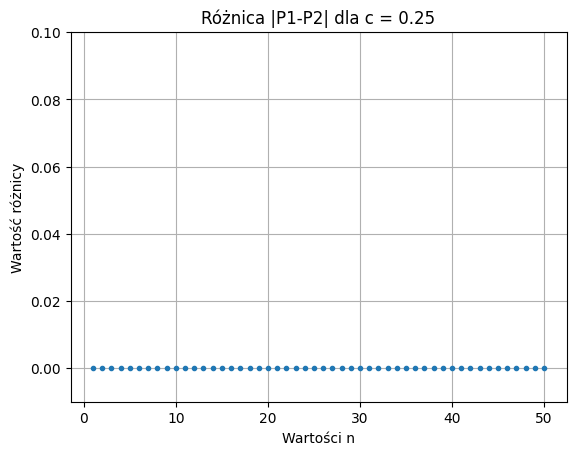

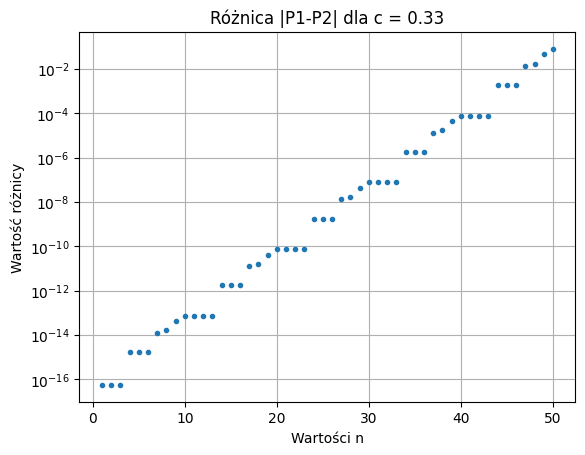

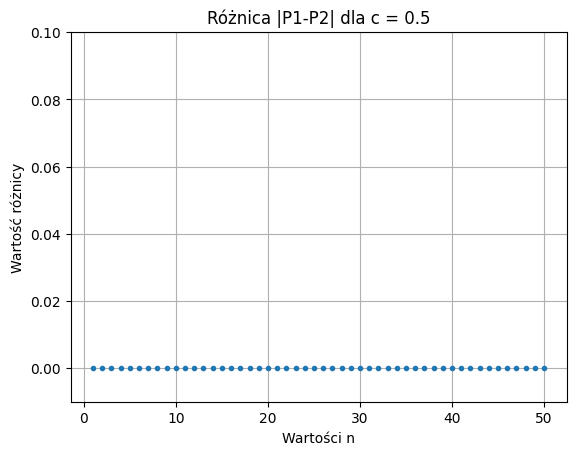

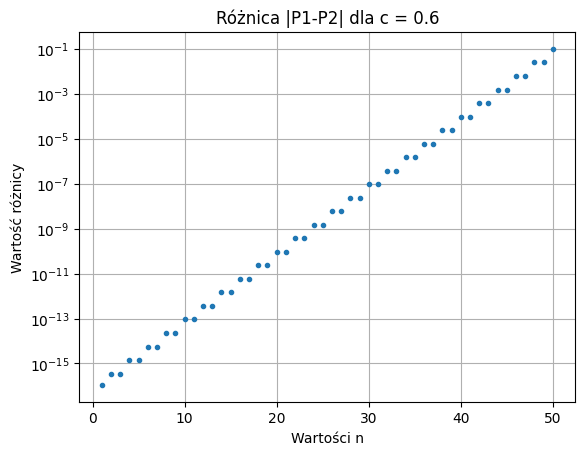

In [27]:
n_list = [i for i in range(1, 51, 1)]
c_list = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]

result_matrix = np.zeros((6, 50))

for i, value_c in enumerate(c_list):
    for j, value_n in enumerate(n_list):
        result_matrix[i][j] = main.p_diff(n=value_n, c=value_c)

for i, row in enumerate(result_matrix):
    ax = plt.subplot()
    ax.plot(n_list, row, '.')
    ax.set(xlabel='Wartości n', ylabel='Wartość różnicy')
    plt.title(label='Różnica |P1-P2| dla c = ' + str(c_list[i]))
    if c_list[i] not in [0.125, 0.25, 0.5]:
        plt.semilogy()
    else:
        plt.ylim((-0.01, 0.1))
    plt.grid()
    plt.show()

***Zadanie 2.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

Ad. 1.
Błąd przybliżenia (spowodowany ograniczoną liczbą iteracji) i błąd metody.

Ad. 2.
Można zaobserowować, że dla N >= 5 błąd jest w przybliżeniu równa zeru.

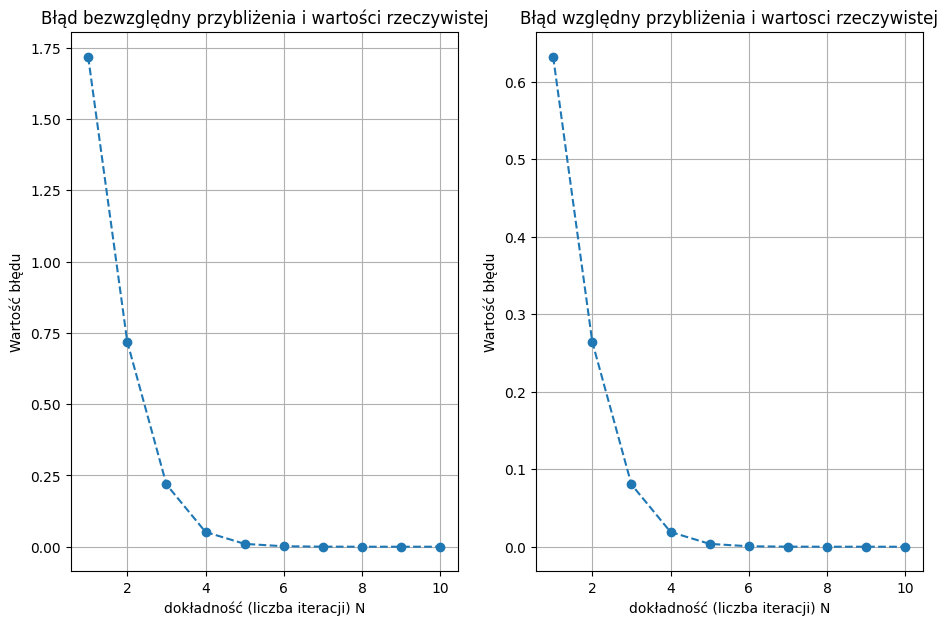

In [31]:
n = [i for i in range(1, 11)]
x = 1
my_e_x = []

real_e_x = np.exp(x)

for ix, item in enumerate(n):
    my_e_x.append(main.exponential(x, item))

absolut_error_vector = bledy.absolut_error(real_e_x, my_e_x)
relative_error_vector = bledy.relative_error(real_e_x, my_e_x)


plt.figure(figsize=(11, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(n, absolut_error_vector, 'o')
ax1.set(xlabel='dokładność (liczba iteracji) N', ylabel='Wartość błędu')
plt.title(label='Błąd bezwzględny przybliżenia i wartości rzeczywistej')
plt.grid()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(n, relative_error_vector, 'o')
ax2.set(xlabel='dokładność (liczba iteracji) N', ylabel='Wartość błędu')
plt.title(label='Błąd względny przybliżenia i wartosci rzeczywistej')
plt.grid()
plt.show()

***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

-1.8369701987210297e-16


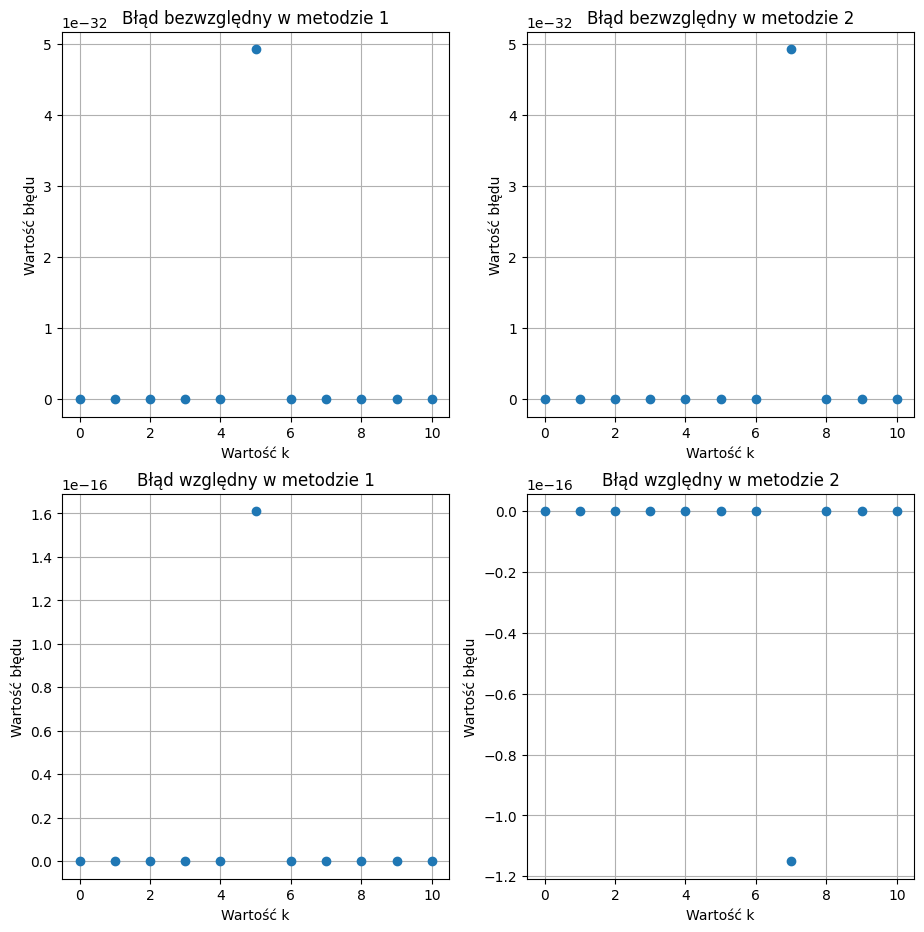

In [39]:
k = [i for i in range(0, 11)]
x = np.pi/2

metoda1 = []
metoda2 = []

for i in k:
    metoda1.append(main.coskx1(i, x))
    metoda2.append(main.coskx2(i, x)[0])

abosult_error_vector1 = []
abosult_error_vector2 = []
relative_error_vector1 = []
relative_error_vector2 = []

for i, value in enumerate(k):
    abosult_error_vector1.append(bledy.absolut_error(np.cos(value*x), metoda1[i]))
    abosult_error_vector2.append(bledy.absolut_error(np.cos(value*x), metoda2[i]))
    relative_error_vector1.append(bledy.relative_error(np.cos(value*x), metoda1[i]))
    relative_error_vector2.append(bledy.relative_error(np.cos(value*x), metoda2[i]))

plt.figure(figsize=(11, 11))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(k, abosult_error_vector1, 'o')
ax1.set(xlabel='Wartość k', ylabel='Wartość błędu')
plt.title(label='Błąd bezwzględny w metodzie 1')
plt.grid()

ax2 = plt.subplot(2, 2, 2)
ax2.plot(k, abosult_error_vector2, 'o')
ax2.set(xlabel='Wartość k', ylabel='Wartość błędu')
plt.title(label='Błąd bezwzględny w metodzie 2')
plt.grid()

ax3 = plt.subplot(2, 2, 3)
ax3.plot(k, relative_error_vector1, 'o')
ax3.set(xlabel='Wartość k', ylabel='Wartość błędu')
plt.title(label='Błąd względny w metodzie 1')
plt.grid()

ax4 = plt.subplot(2, 2, 4)
ax4.plot(k, relative_error_vector2, 'o')
ax4.set(xlabel='Wartość k', ylabel='Wartość błędu')
plt.title(label='Błąd względny w metodzie 2')
plt.grid()
plt.show()

***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

632 ns ± 324 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.01 MiB
906 ns ± 232 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.00 MiB
1.04 µs ± 122 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.00 MiB
1.26 µs ± 143 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.00 MiB
1.65 µs ± 207 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.00 MiB
1.83 µs ± 138 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.00 MiB
2.12 µs ± 148 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 155.83 MiB, increment: 0.00 MiB
2.36 µs ± 315 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak me

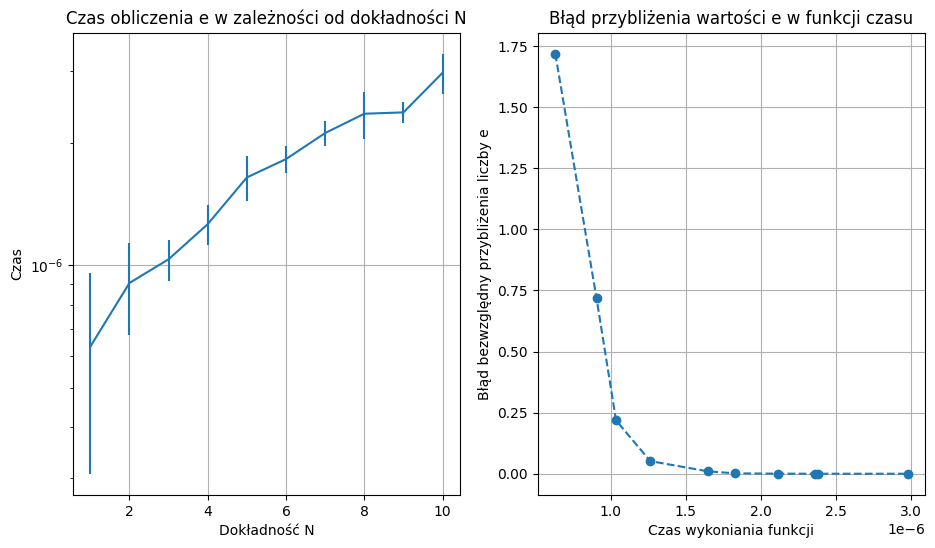

In [40]:
N = [i for i in range(1, 11)]
average = []
stdev = []
real_value = []
x = 1
error_list = []

for ix, value in enumerate(N):
    saved_timing = %timeit -r 5 -n 10 -o main.exponential(x, value)
    average.append(saved_timing.average)
    stdev.append(saved_timing.stdev)
    error_list.append(bledy.absolut_error(np.exp(x), main.exponential(x, value)))
    print('Memory usage: ')
    %memit main.exponential(x, value)

plt.figure(figsize=(11, 6))
ax1 = plt.subplot(1, 2, 1)
plt.errorbar(N, average, yerr=stdev)
ax1.set(xlabel='Dokładność N', ylabel='Czas')
plt.title(label='Czas obliczenia e w zależności od dokładności N')
plt.grid()
plt.semilogy()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(average, error_list, 'o--')
ax2.set(xlabel='Czas wykoniania funkcji', ylabel='Błąd bezwzględny przybliżenia liczby e')
plt.grid()
plt.title(label='Błąd przybliżenia wartości e w funkcji czasu')
plt.show()



Zgodnie z poleceniem do wizualizacji wyników użyłem skali logarytmicznej co według mnie zmniejszyło czytelność lewego wykresu. Analizując powyższe wykresy można stwierdzić, że większa dokładność wiąże się z dłuższym czasem wykonywania funkcji zatem należy rozważnie decydować jak duża dokładność jest potrzebna w obliczeniach by nie wydłużać niepotrzebnie działania programu.

Wnioski:

Podczas laboratorium zapoznałem się z różnymi rodzajami błędu oraz sposobami reprezentacji liczb. Spotkałem się z problemem zaokrągleń oraz stałem się bardziej ostrożny co do dokładności obliczeń komputera. Dodatkowo utrwaliłem wiedzę związaną z rysowaniem wykresów za pomocą biblioteki matplotlib.